In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from neuralnetwork import * # my code
from dnn_class import *
from dnn_regr import *
from regression import * # my code for regression
from misc import *
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sk

# Classification: Breast Cancer



The content of the breast cancer dataset is:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
-------------------------
inputs =  (569, 30)
outputs =  (569,)
labels =  (30,)


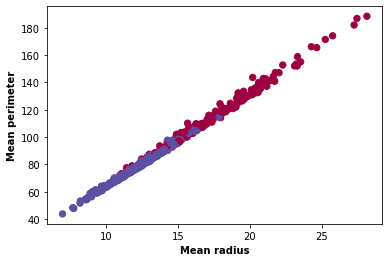

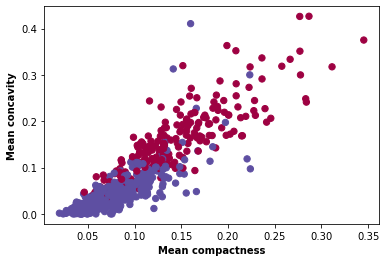

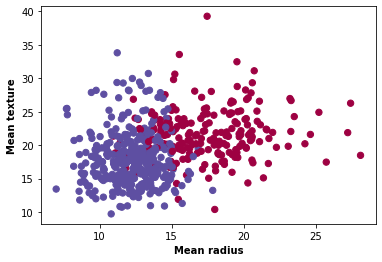

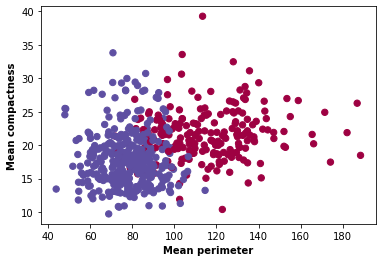

In [5]:
#from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 
import numpy as np
import sklearn as sk
from dnn_regr import *
from dnn_class import *
from misc import *


"""Load breast cancer dataset"""

np.random.seed(0)        #create same seed for random number every time

cancer=load_breast_cancer()      #Download breast cancer dataset

inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

print('The content of the breast cancer dataset is:')      #Print information about the datasets
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

x=inputs      #Reassign the Feature and Label matrices to other variables
y=outputs

# Visualisation of dataset (for correlation analysis)

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean perimeter',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness',fontweight='bold')
plt.ylabel('Mean concavity',fontweight='bold')
plt.show()


plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean texture',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter',fontweight='bold')
plt.ylabel('Mean compactness',fontweight='bold')
plt.show()


# Generate training and testing datasets

#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix

temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       

X_train,X_test,Y_train,Y_test=splitter(X,y,test_size=0.1)   #Split datasets into training and testing

#y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
#y_test=to_categorical(y_test)
lb = sk.preprocessing.LabelBinarizer()
y = lb.fit_transform(Y_train)
y_next = np.where(Y_train==0,1,0)
y = y.T
y = list(y)
y.append(y_next)
Y_train = np.array(y)
lb = sk.preprocessing.LabelBinarizer()
y_t = lb.fit_transform(Y_test)
y_next = np.where(Y_test==0,1,0)
y_t = y_t.T
y_t = list(y_t)
y_t.append(y_next)
Y_test = np.array(y_t)


# Define tunable parameters"

eta=np.logspace(-3,-1,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_train.T.shape)
print(Y_train.reshape(1,-1).shape)
# Normalize
X_train = X_train/np.max(X)
X_test = X_test/np.max(X)

(512, 4)
(2, 512)
(4, 512)
(1, 1024)


In [7]:
model= DNNClassifier(layer_dims=[X_train.shape[1], 6, 4,3, 1],hidden_layers=['sigmoid','sigmoid','sigmoid','softmax'],
                      optimization_method='ADAM',tolarance=None,batch_size=10,max_epoch=700,verbose=0,seed=25)
model.fit(X_train.T,Y_train.reshape(1,-1))
model.predict(X_test.T)

/Users/adelezaini/Desktop/MachineLearning/Projects/Project2/dnn_class.py:173: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(X) / np.sum(np.exp(X),axis=0)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Y [[1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1
  0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
  1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1
  0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1
  1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1
  0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1
  1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1
  1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0
  0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1
  1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0
  0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1
  1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1
  0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 

Y [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

Y [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

Y [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

Y [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

  1. 1. 1. 1. 1. 1. 1. 1.]]
a [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

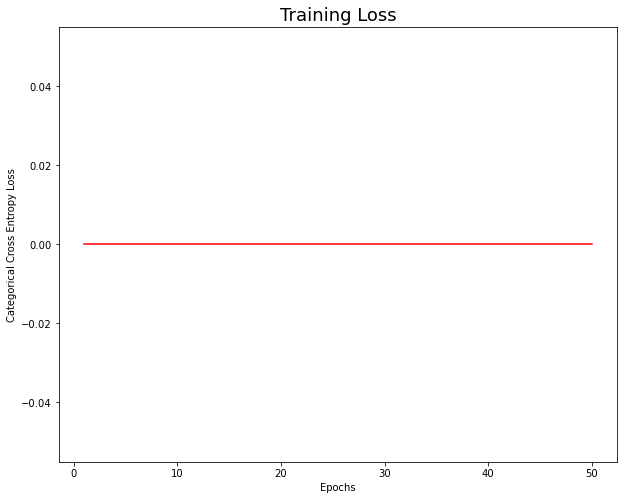


Training Loss :  0.0

Training Accuracy :  1.0
Y [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1.]]
a [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
b [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Testing loss (MSE): 0.38596491228070173
Testing loss (R2): -0.6285714285714288


'\nlmd = 0.1\neta = 0.01\n\n\n\nmodelR = Deep_Neural_Network()\nmodelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type=\'regression\', activation=\'sigmoid\')\nfig = plt.figure(figsize = (10,8))\nmodelR.train(X_train.T, Y_train.reshape(1,-1), optimizer=\'vanilla\',regularizer=\'l2\',\n                    regularizer_lambda=lmd, mini_batch_size=32,epochs=200, print_loss_freq=10,\n                    learning_rate=eta)\nfig.savefig(\'Figures/RegrNN_200_50_L2_32_50_0.0002.jpg\')\nY_nn = modelR.predict(X_test.T)\n\nprint("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))\nprint("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))'

In [33]:
model = Deep_Neural_Network()
model.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='classification', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
Y_model = model.to_one_hot(Y_train.reshape(1,-1))
model.train(X_train.T, Y_model, optimizer='vanilla',regularizer=None,
                    mini_batch_size=32,epochs=50, print_loss_freq=10,
                    learning_rate=0.001)
fig.savefig('Figures/ClassNN.jpg')
Y_nn = model.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))

"""
lmd = 0.1
eta = 0.01



modelR = Deep_Neural_Network()
modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer='l2',
                    regularizer_lambda=lmd, mini_batch_size=32,epochs=200, print_loss_freq=10,
                    learning_rate=eta)
fig.savefig('Figures/RegrNN_200_50_L2_32_50_0.0002.jpg')
Y_nn = modelR.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))"""

In [ ]:
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()
    
plot_data(eta,n_neuron,Train_accuracy, 'training')
plot_data(eta,n_neuron,Test_accuracy, 'testing')

### Trying my own code

In [3]:
"""print(X.shape[0])
print(X.shape[1])
print(Y_train.shape[0])
#print(Y_train.shape[1])
hidden_layers = [3,2,3]
regrNN = NN_Regression(hidden_layers)
regrNN.fit(X_train.T,Y_train)"""

'print(X.shape[0])\nprint(X.shape[1])\nprint(Y_train.shape[0])\n#print(Y_train.shape[1])\nhidden_layers = [3,2,3]\nregrNN = NN_Regression(hidden_layers)\nregrNN.fit(X_train.T,Y_train)'

## Task b
1. Compare results with code from project 1

### Trying Simone's code

In [4]:
print(X_train.shape)
print(Y_train.shape)

(404, 2)
(404,)


OLS - Linear Regression:
––––––––––––––––––––––––––––––––––––––-
Training loss (MSE): 28.2979
Testing loss (MSE): 39.5247
Testing loss (R2): 0.5567

OLS - Neural Network:
––––––––––––––––––––––––––––––––––––––-
After 10 epochs :    Training Loss = 0.36076190026171384

After 20 epochs :    Training Loss = 0.3471082339771132

After 30 epochs :    Training Loss = 0.3410190839984932

After 40 epochs :    Training Loss = 0.33577232490536574

After 50 epochs :    Training Loss = 0.33074549018346266



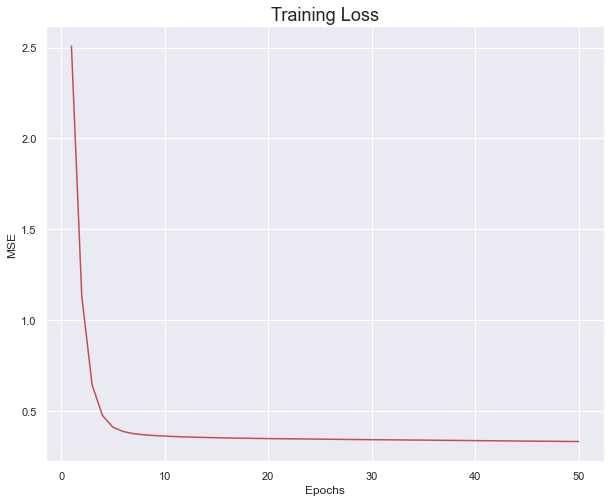


Training Loss :  0.33074549018346266
Testing loss (MSE): 0.6140005938622441
Testing loss (R2): 0.38599940613775585

––––––––––––––––––––––––––––––––––––––-
––––––––––––––––––––––––––––––––––––––-

Ridge - Linear Regression:
––––––––––––––––––––––––––––––––––––––-
Training loss (MSE): 31.9604
Testing loss (MSE): 25.0523
Testing loss (R2): 0.6329

Ridge - Neural Network:
––––––––––––––––––––––––––––––––––––––-
After 10 epochs :    Training Loss = 10.183518429896235

After 20 epochs :    Training Loss = 7.853798626665673

After 30 epochs :    Training Loss = 6.070015835377438

After 40 epochs :    Training Loss = 4.705018134837419

After 50 epochs :    Training Loss = 3.661852607937247

After 60 epochs :    Training Loss = 2.8598211823358244

After 70 epochs :    Training Loss = 2.246091812592173

After 80 epochs :    Training Loss = 1.7779702850025791

After 90 epochs :    Training Loss = 1.4152812834005022

After 100 epochs :    Training Loss = 1.1413386559553447

After 110 epochs :   

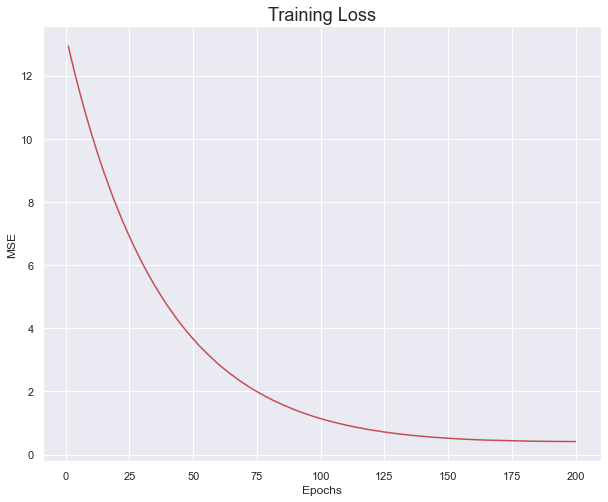


Training Loss :  0.4153706515936057
Testing loss (MSE): 0.6458649250074471
Testing loss (R2): 0.3541350749925529


In [5]:
ols = OLSRegression(X, Y)
ols.split().rescale().fit()

print("OLS - Linear Regression:")
print("––––––––––––––––––––––––––––––––––––––-")
print("Training loss (MSE):", ols.MSE_train())
print("Testing loss (MSE):", ols.MSE_test())
print("Testing loss (R2):", ols.R2_test())
print()
print("OLS - Neural Network:")
print("––––––––––––––––––––––––––––––––––––––-")

modelO = Deep_Neural_Network()
modelO.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
modelO.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer=None,
                    mini_batch_size=32,epochs=50, print_loss_freq=10,
                    learning_rate=0.001)
fig.savefig('Figures/RegrNN_200_50_None_32_50_0.0002.jpg')
Y_nn = modelO.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))

lmd = 0.1
eta = 0.01

ridge = RidgeRegression(X, Y, lmd = lmd)
ridge.split().rescale().fit()

print()
print("––––––––––––––––––––––––––––––––––––––-")
print("––––––––––––––––––––––––––––––––––––––-")
print()
print("Ridge - Linear Regression:")
print("––––––––––––––––––––––––––––––––––––––-")
print("Training loss (MSE):", ridge.MSE_train())
print("Testing loss (MSE):", ridge.MSE_test())
print("Testing loss (R2):", ridge.R2_test())
print()
print("Ridge - Neural Network:")
print("––––––––––––––––––––––––––––––––––––––-")

modelR = Deep_Neural_Network()
modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer='l2',
                    regularizer_lambda=lmd, mini_batch_size=32,epochs=200, print_loss_freq=10,
                    learning_rate=eta)
fig.savefig('Figures/RegrNN_200_50_L2_32_50_0.0002.jpg')
Y_nn = modelR.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))

2. Find optimal lmd and eta

LAMBDA VS LEARNING RATE PERFORMANCE
After 101 epochs :    Training Loss = 18.88771962159241

After 101 epochs :    Training Loss = 15.03733889487398

After 101 epochs :    Training Loss = 13.273720886477566

After 101 epochs :    Training Loss = 13.215497659507458

After 101 epochs :    Training Loss = 13.084009000327937

After 101 epochs :    Training Loss = 13.893607721342509

After 101 epochs :    Training Loss = 13.966902526979352

After 101 epochs :    Training Loss = 13.966591618367884

After 101 epochs :    Training Loss = 13.964655631000664

After 101 epochs :    Training Loss = 13.962532350604246

After 101 epochs :    Training Loss = 13.967745906366847

After 101 epochs :    Training Loss = 14.015451985293536

After 101 epochs :    Training Loss = 14.108664535971029

After 101 epochs :    Training Loss = 14.107656884994253

After 101 epochs :    Training Loss = 14.10210853762673

After 101 epochs :    Training Loss = 14.099050070471524

After 101 epochs :    Training Loss = 1

NameError: name 'lamdas' is not defined

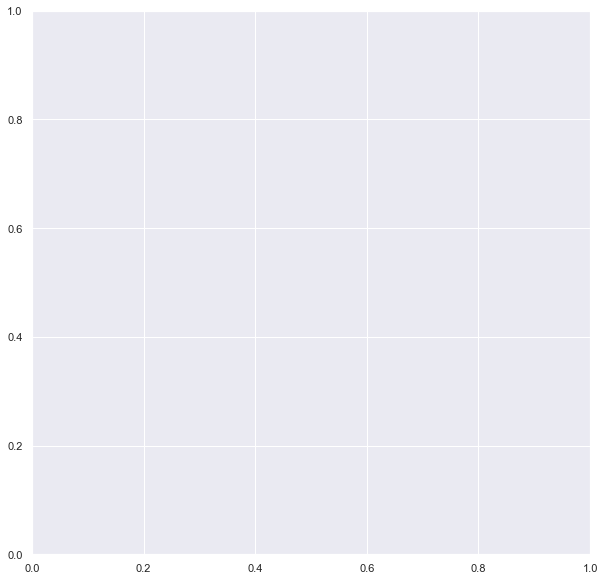

In [6]:
print("LAMBDA VS LEARNING RATE PERFORMANCE")

lambdas = [0,1e-12, 1e-10, 1e-5, 1e-2, 0.1]
etas = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 0.1]
#etas = np.logspace(-5, 1, 12)
#lambdas = np.logspace(-12, 1, 12)

mse = np.zeros((len(lambdas), len(etas)))
r2 = np.zeros((len(lambdas), len(etas)))

modelR = Deep_Neural_Network()
modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')

for i in range(len(lambdas)):
    for j in range(len(etas)):
        modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer='l2',
                    regularizer_lambda=lambdas[i], mini_batch_size=32, epochs=200, print_loss_freq=202,
                    learning_rate=etas[j], plot_loss = False)
        Y_nn = modelR.predict(X_test.T)
        
        mse[i][j] = mean_squared_error(Y_test, Y_nn.ravel())
        r2[i][j] = r2_score(Y_test, Y_nn.ravel())
        
        
        """
        if mse_ols[i][j] > 1.:
            mse_ols[i][j] = 1.
            
        if mse_ridge[i][j] > 1.:
            mse_ridge[i][j] = 1.
        """

import seaborn as sns

sns.set()

ind= find_min_indexes(mse)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("MSE: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse, annot=True, ax=ax, cmap="viridis", xticklabels=lambdas, cbar_kws={'label': 'MSE'}, yticklabels=etas, vmin=0, vmax=1, linewidths=.5)
ax.set_title("MSE performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_MSE.jpg')
plt.show()

ind= find_max_indexes(r2)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("R2: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse, annot=True, ax=ax, cmap="viridis", xticklabels=lambdas, cbar_kws={'label': 'R2'}, yticklabels=etas, vmin=0, vmax=1, linewidths=.5)
ax.set_title("R2 performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_R2.jpg')
plt.show()

MSE: Best result given by lambda = 0.01 and learning rate = 0.001


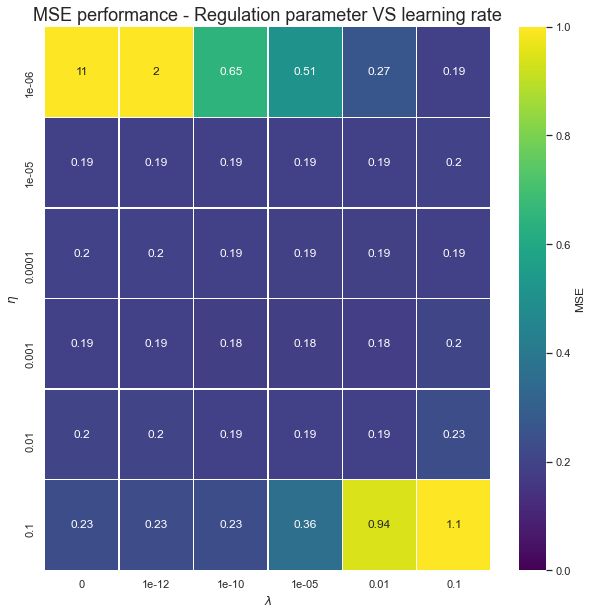

R2: Best result given by lambda = 0.01 and learning rate = 0.001


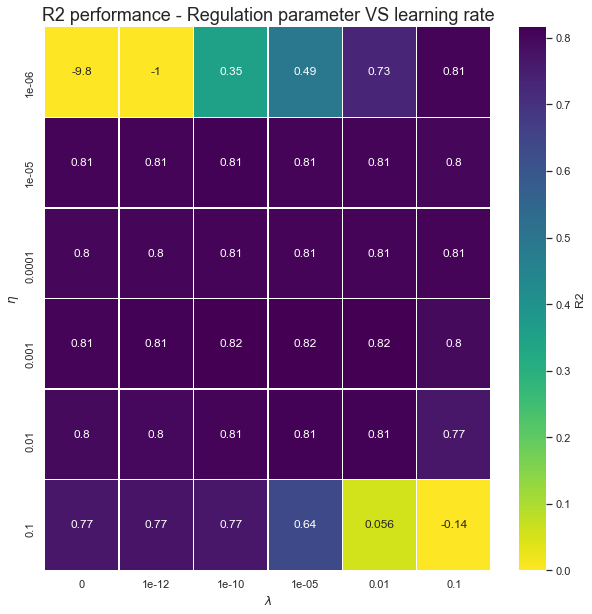

In [13]:
sns.set()

ind= find_min_indexes(mse)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("MSE: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse, annot=True, ax=ax, cmap="viridis", xticklabels=lambdas, cbar_kws={'label': 'MSE'}, yticklabels=etas, vmin=0, vmax=1, linewidths=.5)
ax.set_title("MSE performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_MSE.jpg')
plt.show()

ind= find_max_indexes(r2)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("R2: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(r2, annot=True, ax=ax, cmap="viridis_r", xticklabels=lambdas, cbar_kws={'label': 'R2'}, vmin =0,yticklabels=etas, linewidths=.5)
ax.set_title("R2 performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_R2.jpg')
plt.show()

## Task c: best activation function

In [ ]:
activations = ['sigmoid', 'relu', 'lrelu']
Y_nn = {}
epochs = 50
r = list(range(1,epochs+1))

fig = plt.figure()
for a in activations:

    modelR = Deep_Neural_Network()
    modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation=a)
    train_cost, acc =modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer=None,
                        mini_batch_size=32,epochs=epochs, print_loss_freq=epochs+1,
                        learning_rate=0.0001, plot_loss = False)
    plt.plot(r,train_cost,label = a)
    Y_nn[a] = modelR.predict(X_test.T)

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training Loss: activation functions', fontsize=18)
plt.legend()
plt.show()
fig.savefig('Figures/RegrNN_activations.jpg')
    
"""  
print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))
"""